# Numerical Integration
This is actually a project I did way back in Calculus 2 as a Freshman. It was one of my first codingg projects. I decided to throw it into the math unit just as a reference on how this all can be done programatically.

As a whole, this thing could probably use some cleanup as it was code written by a Freshman that didn't know any better. Some of it is kind of "head scratchy" and I would like to avoid using that symbolic math stuff

In [5]:
# To achieve a better workflow, I seperated the import statements to here
#
#
import sympy as sym
from sympy import Symbol, sin, cos # for trig
from sympy.solvers import solve
from sympy.utilities.lambdify import lambdify # for shortening lines 41-43
import numpy as np # for arange method
from matplotlib import pyplot as plt
from scipy.integrate import simps
x = Symbol('x')

In [6]:
# GG2022: Probably can be a lambda
def f2(x): # Changing this changes function integrated
    return x**3 + 3*x

Enter the beginning of the interval: 3
Enter the end of the interval: 6
Enter the number of subintervals: 1000

The function to be integrated is: x**3 + 3*x 

Midpoint Sum: The function is approximately equal to 344.2500
The approximate error is: 4.05e-05 

Trapezoidal sum: The function is approximately equal to 344.2501
The approximate error is: 8.1e-05 

Simpson's Rule: The function is approximately equal to 344.2500
The approximate error is: 0.0 



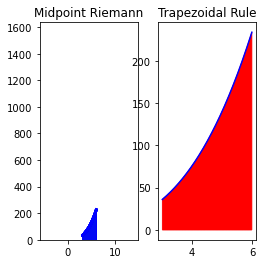

In [7]:
def Midpoint(f, step, a, b, n): # calculates by midpoint rule
    integral_value = 0
    x_points = np.arange(a,b,step)
    for array_index in x_points[:]:
        integral_value += (f2(0.5*(array_index+array_index+step)))
    integral_value *=step
  
    print('Midpoint Sum: The function is approximately equal to',format(integral_value, '.4f'))

def calculate_derivatives(rule, f2):
    # All this stuff here: Use a different differentiation method 
    if rule == 'T':
        derivative = sym.diff(f2(x),x,x)
    elif rule == 'M':
        derivative = sym.diff(f2(x),x,x) # second derivative for trap or mid
    else:
        derivative = sym.diff(f2(x),x,x,x,x) # fourth derivative for simps
    return derivative

def calculate_error(derivative, a ,b, n, x, method):# FInd critical numbers, plug in, get max, plug into error
    new_derivative = sym.diff(derivative,x)
    try:
        critical_numbers = [sym.nsolve(new_derivative,a,real = True)]
    except ValueError:
        critical_numbers = [0]
    except KeyError:
        critical_numbers = [0]
    except ZeroDivisionError:
        print('The error could not be calculated. I am sorry. :( ''\n') # For when an integral is breaking everything
        return
    except:
        critical_numbers = [sym.nsolve(new_derivative,a, real=True)]
    critical_numbers.append(a)
    critical_numbers.append(b) # Previous two lines put in endpoints into critical numbers list
    d = lambdify(x,derivative, 'sympy')
    critical_numbers = [x for x in critical_numbers if not(x<a or x>b)] #Removes critical numbers not in [a,b]
    critical_numbers = [abs(d(x)) for x in critical_numbers] # Absolute values all indices and plugs them into respective derivative for calculating maximum
    K = max(critical_numbers) # Finds maximum of them
    if method == 'M': # letters determine which error calculation formula to use
        error = (K*((b-a)**3)) / (24*n**2)
        print('The approximate error is:',error, '\n')
    elif method == 'T':
        error = (K*((b-a)**3)) / (12*n**2)
        print('The approximate error is:',error, '\n')
    elif method == 'Simpson':
        error = (K*((b-a)**5)) / (180*n**4)
        print('The approximate error is:',error, '\n')


def Trapezoidal(f, step, a, b, n): # Calculates by Trapezoidal rule
    outside = 0.5 * step # (b-a)/n
    x_points = np.arange(a,b,step)
    integral_value = f2(a)
    for array_index in x_points[1:]:
        integral_value += (2*f2(array_index))
    integral_value += f2(b)
    integral_value *= outside
    
    print('Trapezoidal sum: The function is approximately equal to', format(integral_value, '.4f'))

def Simpson(f2, step, a, b, n): #Extremely accurate
    outside = step/3
    x_points = np.arange(a,b,step)
    integral_value = f2(a) # x sub zero
    ordinate = 1
    for array_index in x_points[1:]:
        if ordinate%2==0:
           integral_value += (2*f2(array_index))#multiply by 2 if ordinate number is even
           ordinate +=1
        else:
            integral_value += (4*f2(array_index))#multiply by 4 if ordinate number is odd
            ordinate +=1
    integral_value += f2(b)
    integral_value *= outside
    
    print("Simpson's Rule: The function is approximately equal to", format(integral_value, '.4f'))

def f(x):
    return x**2

def plot(a, b, n,step, f2):
    # Midpoint
    xm = np.arange(a,b,step)
    ym = [f2(x) for x in xm]
    plt.subplot(1,3,1)
    plt.plot(xm,ym,'b') # 'b' makes it blue!
    x_mid = (xm[:-1] + xm[1:])/2 # Midpoints
    y_mid = f2(x_mid)
    plt.plot(x_mid,y_mid,'b.',markersize=2)
    plt.bar(x_mid,y_mid,width=step,alpha=0.2,edgecolor='b')
    plt.margins(a,b)
    plt.title('Midpoint Riemann')
    
    # Trapezoidal
    plt.subplot(1,3,2)
    plt.plot(xm,f2(xm),'b')
    for i in range(n-1):
        xs = [xm[i],xm[i],xm[i+1],xm[i+1]]
        ys = [0,ym[i],ym[i+1],0]
        plt.fill(xs,ys,'r',edgecolor='r',alpha=0.2)
    plt.title('Trapezoidal Rule')
    """
    plt.subplot(1,3, 3)
    plt.plot(xm ,ym, 'b')
    plt.title("¯\_(.  _.)_/¯")
    """
    plt.show()
    
def main():
    beginning_interval = float(input('Enter the beginning of the interval: '))
    ending_interval = float(input('Enter the end of the interval: '))
    number_of_subintervals = int(input('Enter the number of subintervals: '))
    while not(number_of_subintervals%2 ==0):
        print('Subintervals must be even.')
        number_of_subintervals = int(input('Enter the number of subintervals: '))
    print('\n''The function to be integrated is:',str(f2(x)),'\n')
    # Collecting intervals, n, and step size
    a = beginning_interval
    b = ending_interval
    n = number_of_subintervals
    step = ((b-a)/ number_of_subintervals)
    # Reassigning for clarity sake
    f = f2(step)
    
    Midpoint(f2, step, a, b, n)
    derivative = calculate_derivatives('M', f2)
    error = calculate_error(derivative, a, b, n, x, 'M')
    
    Trapezoidal(f2, step, a, b, n)
    derivative = calculate_derivatives('T', f2)
    error = calculate_error(derivative, a, b, n, x, 'T')
                            
    Simpson(f2, step, a, b, n)
    derivative = calculate_derivatives('Simpson', f2)
    error = calculate_error(derivative, a, b, n, x, 'Simpson')
    # The following code has been adapted from math.ubc.ca
    plot(a, b, n, step, f2)
    
main()


In [1]:
# Given three points, find the ax**2 +bx+c form that goes through the three

# GG2022: I never finished this, but this sounds like I can use that Newton interpolation. My study
# is already coming in handy
def calcParabola(p1,p2,p3):
    a =  
    b =
    c =
    

SyntaxError: invalid syntax (2047566745.py, line 6)